In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr, kendalltau
from scipy.stats import binomtest


In [ ]:
normal_rec = pd.read_csv("/kaggle/input/recommendation-calculated/recommendation_with_scores.csv",engine='python')


In [7]:
normal_rec.head()

,song_title,tag,lyrics,best1_title,best1_score,best2_title,best2_score,best3_title,best3_score,best4_title,best4_score,best5_title,best5_score
0,Poor Poor Pitiful Me,country,Well I lay my head on the railroad track\nWait...,Faceless Things,0.526864,How I Fucked Your Mother,0.523354,Cuck 'Em All 2,0.504174,Toy Box Killers,0.500357,Trew Calling,0.499681
1,Cuckoos Nest,country,There is a thorn bush\nIn Outcolia\nThere is a...,Soul Catcher,0.538646,Lácrimas,0.530201,Bathwell in Clerkentime,0.514016,Coo-Coo Bird Dog,0.505178,Dominion,0.502486
2,Wedding Bells,country,I have the invitation that your sent me\nYou w...,Tainted Love,0.588257,Surrender!,0.549636,A Love Letter to All Those Men,0.543320,Thirteen,0.489043,Black Tie Optional,0.484910
3,Could Have Fooled Me,country,Im fading like the taillights\nOf a car that y...,Tainted Love,0.720001,愛という名の銃弾,0.613563,愛という名の銃弾,0.613563,Surrender!,0.612859,Misery Loves Company,0.585945
4,Shot of Glory,country,Its finally payday\nMeeting the boys at my pla...,The White Stripes: Under Nova Scotian Lights,0.592151,Buddy Guy Live From Red Rocks 2013,0.591826,Queens of the Stone Age : Itunes Festival 2013,0.566841,Nashville Pussy: Keep On Fuckin' in Paris,0.562291,Great Balls of Fire,0.561825


In [8]:
encoded_rec.head()

,song_title,tag,lyrics,best1_title,best1_score,best2_title,best2_score,best3_title,best3_score,best4_title,best4_score,best5_title,best5_score
0,Poor Poor Pitiful Me,country,Well I lay my head on the railroad track\nWait...,Men In Pain: Basement Vamp,0.925269,Straight Outta Vagina,0.921785,The Princess Strikes Back,0.919803,Sparks,0.919345,Interracial Surrender 5,0.919203
1,Cuckoos Nest,country,There is a thorn bush\nIn Outcolia\nThere is a...,Let's Misbehave,0.934802,Hinterland,0.925718,Aukštyn kojom,0.922181,Everybody Sing,0.922109,Carcass Of Crow,0.917187
2,Wedding Bells,country,I have the invitation that your sent me\nYou w...,Tainted Love,0.916142,A Love Letter to All Those Men,0.903798,Moanologue,0.882991,A Thing Called Love,0.882191,"Maria, I Need Your Lovin'",0.881048
3,Could Have Fooled Me,country,Im fading like the taillights\nOf a car that y...,Tainted Love,0.938411,Avril Lavigne: Live and Exclusive (CBS),0.908435,Surrender!,0.908254,愛という名の銃弾,0.907244,愛という名の銃弾,0.907244
4,Shot of Glory,country,Its finally payday\nMeeting the boys at my pla...,I Wonder Who's Kissing Her Now,0.939401,愛という名の銃弾,0.931479,愛という名の銃弾,0.931479,Taboo Diaries 10,0.927101,Scorpions: Live in Sopot Festival Poland 2005,0.916744


In [6]:
def ranking_correlations(normal_rec: pd.DataFrame,
                         encoded_rec: pd.DataFrame,
                         top_k: int = 5) -> pd.DataFrame:
    """
    For each row (song), compute Spearman's rho and Kendall's tau
    between the two Top‑K title lists.
    """
    rho_list, tau_list = [], []

    for i, (n_row, e_row) in enumerate(zip(normal_rec.itertuples(index=False),
                                           encoded_rec.itertuples(index=False))):
        # Extract Top‑K titles
        norm_titles = [getattr(n_row, f'best{j}_title') for j in range(1, top_k+1)]
        enc_titles  = [getattr(e_row, f'best{j}_title') for j in range(1, top_k+1)]

        # Build union of items, preserving order
        all_items = list(dict.fromkeys(norm_titles + enc_titles))

        # Assign ranks: missing ⇒ top_k+1
        rank_norm = [norm_titles.index(item)+1 if item in norm_titles else top_k+1
                     for item in all_items]
        rank_enc  = [enc_titles.index(item)+1 if item in enc_titles else top_k+1
                     for item in all_items]

        # Compute correlations
        rho, _ = spearmanr(rank_norm, rank_enc)
        tau, _ = kendalltau(rank_norm, rank_enc)

        rho_list.append(rho)
        tau_list.append(tau)

    return pd.DataFrame({
        'song_title': normal_rec['song_title'],
        'spearman_rho': rho_list,
        'kendall_tau':  tau_list
    })

# --- Usage:
# Assuming your DataFrames are `normal_rec` and `encoded_rec`:
corr_df = ranking_correlations(normal_rec, encoded_rec, top_k=5)

# Quick summary:
print(corr_df[['spearman_rho','kendall_tau']].describe())


        spearman_rho    kendall_tau
count  519947.000000  519947.000000
mean       -0.478267      -0.402525
std         0.407013       0.320040
min        -1.000000      -1.000000
25%        -0.862069      -0.714286
50%        -0.572727      -0.466667
75%        -0.254545      -0.240000
max         1.000000       1.000000


In [2]:
pairwise_result = pd.read_csv("/kaggle/input/pairwise-result/gemini_pairwise_results_v2.csv")
pairwise_result.head()

,index,winner,list_a_score,list_b_score
0,70423.0,A,3.0,2.0
1,211483.0,B,4.0,5.0
2,364470.0,Tie,1.0,1.0
3,377711.0,Tie,2.0,2.0
4,350049.0,A,3.0,1.0


In [3]:
pairwise_result.shape

(17670, 4)

In [4]:
# with bitwise operators
mask = (
    (pairwise_result["winner"] == "A") |
    (pairwise_result["winner"] == "B") |
    (pairwise_result["winner"] == "Tie")
)
pairwise_result = pairwise_result[mask]
pairwise_result.shape

(17656, 4)

In [5]:
songs_df = pd.read_csv("/kaggle/input/reduce-lyrics/reduced_lyrics.csv")
songs_df.head()

,title,tag,lyrics
0,Poor Poor Pitiful Me,country,[Verse 1]\nWell I lay my head on the railroad ...
1,Cuckoos Nest,country,There is a thorn bush\nIn Outcolia\n\nThere is...
2,Wedding Bells,country,I have the invitation that your sent me\nYou w...
3,Could Have Fooled Me,country,I'm fading like the taillights\nOf a car that ...
4,Shot of Glory,country,It's finally payday\nMeeting the boys at my pl...


In [6]:
pairwise_result['winner'] = pairwise_result['winner'].replace({
    'A': 'Model A',
    'B': 'Model B'
})

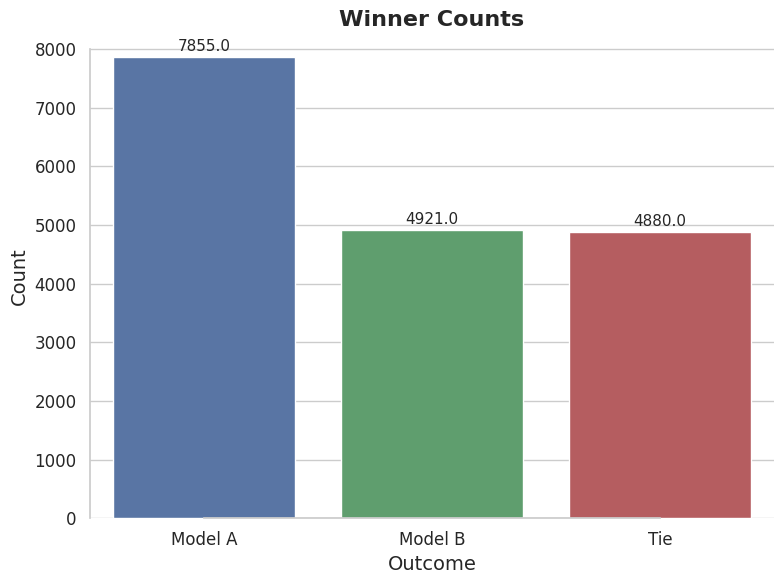

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply a clean Seaborn theme
sns.set_theme(style="whitegrid", palette="pastel")

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=pairwise_result,
    x='winner',
    order=['Model A', 'Model B', 'Tie'],
    palette=['#4C72B0', '#55A868', '#C44E52']
)

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 50,
        f'{height}',
        ha='center',
        va='bottom',
        fontsize=11
    )

# Tidy up labels and title
ax.set_title('Winner Counts', fontsize=16, weight='bold')
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize=12)

# Remove top and right spines
sns.despine(trim=True)

plt.tight_layout()
plt.savefig('winner_counts.png', dpi=300, bbox_inches='tight')
plt.show()


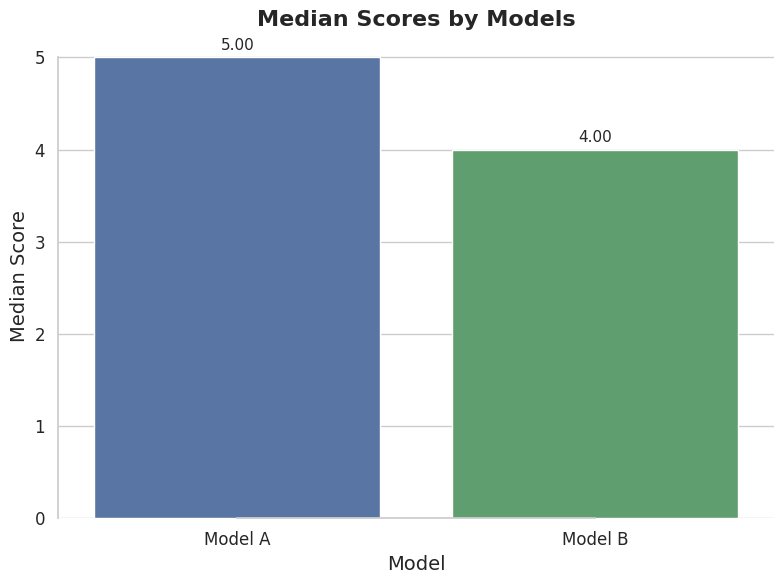

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reload your data if needed
# pairwise_result = pd.read_csv('results.csv')

# Compute medians
median_scores = (
    pairwise_result[['list_a_score','list_b_score']]
    .median()
    .rename({'list_a_score':'Model A','list_b_score':'Model B'})
    .reset_index()
    .rename(columns={'index':'Model',0:'Median Score'})
)

# Set up theme
sns.set_theme(style="whitegrid", palette="pastel")

# Draw barplot
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=median_scores,
    x='Model',
    y='Median Score',
    palette=['#4C72B0','#55A868']
)

# Annotate each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 0.05,
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=11
    )

# Tidy labels
ax.set_title('Median Scores by Models', fontsize=16, weight='bold')
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Median Score', fontsize=14)
ax.tick_params(labelsize=12)

# Remove top/right spines
sns.despine(trim=True)

plt.tight_layout()

# Save to file
plt.savefig('median_scores_by_model.png', dpi=300, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


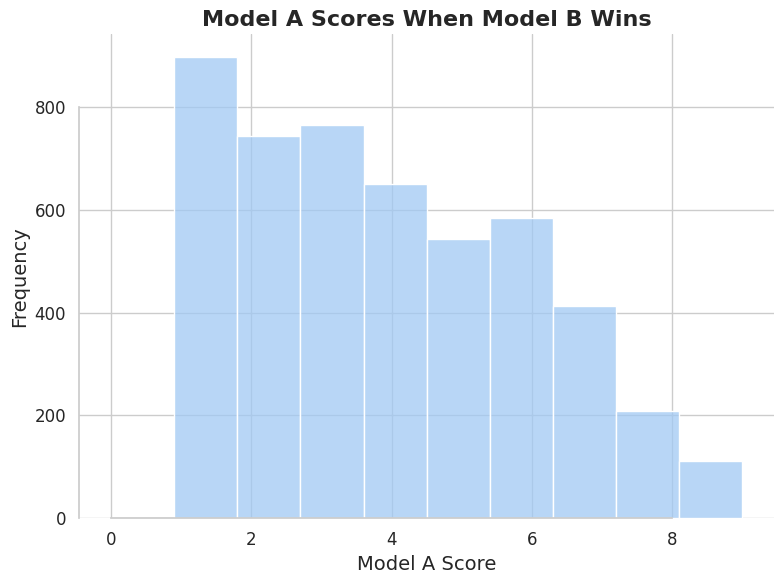

In [11]:

# Ensure winner labels read “Model A” / “Model B”
pairwise_result['winner'] = pairwise_result['winner'].replace({
    'A': 'Model A',
    'B': 'Model B'
})

# Set a consistent theme
sns.set_theme(style="whitegrid", palette="pastel")

# 1) Histogram of Model A scores when B wins
a_when_b = pairwise_result.loc[pairwise_result['winner']=='Model B', 'list_a_score']

plt.figure(figsize=(8,6))
ax = sns.histplot(
    a_when_b,
    bins=10,
    kde=False,
    edgecolor="w"
)
ax.set_title('Model A Scores When Model B Wins', fontsize=16, weight='bold')
ax.set_xlabel('Model A Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(labelsize=12)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('hist_modelA_when_B_wins.png', dpi=300, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


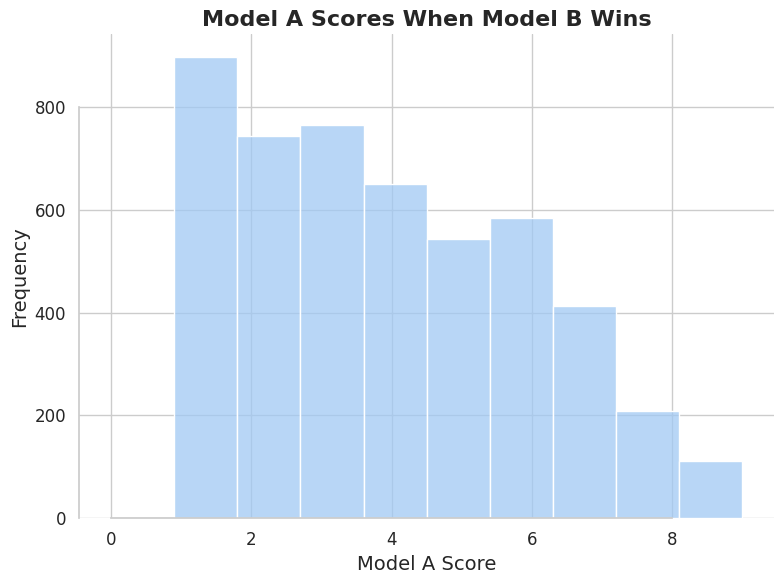

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload data (if needed)
# pairwise_result = pd.read_csv('results.csv')

# Ensure winner labels read “Model A” / “Model B”
pairwise_result['winner'] = pairwise_result['winner'].replace({
    'A': 'Model A',
    'B': 'Model B'
})

# Set a consistent theme
sns.set_theme(style="whitegrid", palette="pastel")

# 1) Histogram of Model A scores when B wins
a_when_b = pairwise_result.loc[pairwise_result['winner']=='Model B', 'list_a_score']

plt.figure(figsize=(8,6))
ax = sns.histplot(
    a_when_b,
    bins=10,
    kde=False,
    edgecolor="w"
)
ax.set_title('Model A Scores When Model B Wins', fontsize=16, weight='bold')
ax.set_xlabel('Model A Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(labelsize=12)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('hist_modelA_when_B_wins.png', dpi=300, bbox_inches='tight')
plt.show()


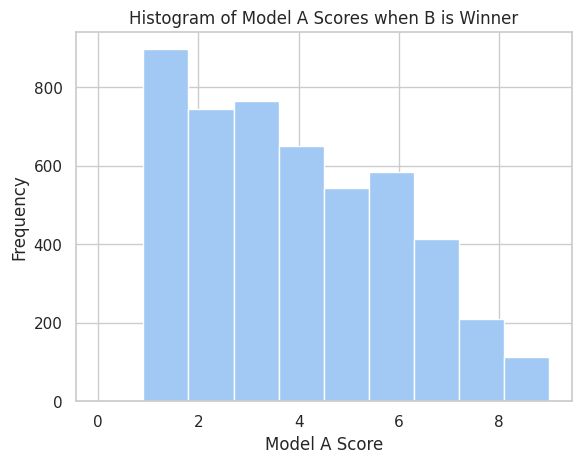

In [13]:
# 1) Histogram of Model A scores when B is the winner
a_when_b = pairwise_result[pairwise_result['winner'] == 'Model B']['list_a_score']
fig, ax = plt.subplots()
ax.hist(a_when_b, bins=10)
ax.set_title('Histogram of Model A Scores when B is Winner')
ax.set_xlabel('Model A Score')
ax.set_ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.11/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


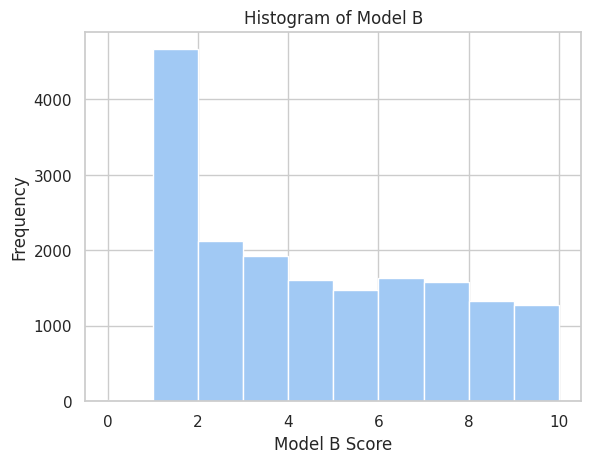

In [14]:
# 1) Histogram of Model B
a_when_b = pairwise_result['list_b_score']
fig, ax = plt.subplots()
ax.hist(a_when_b, bins=10)
ax.set_title('Histogram of Model B')
ax.set_xlabel('Model B Score')
ax.set_ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


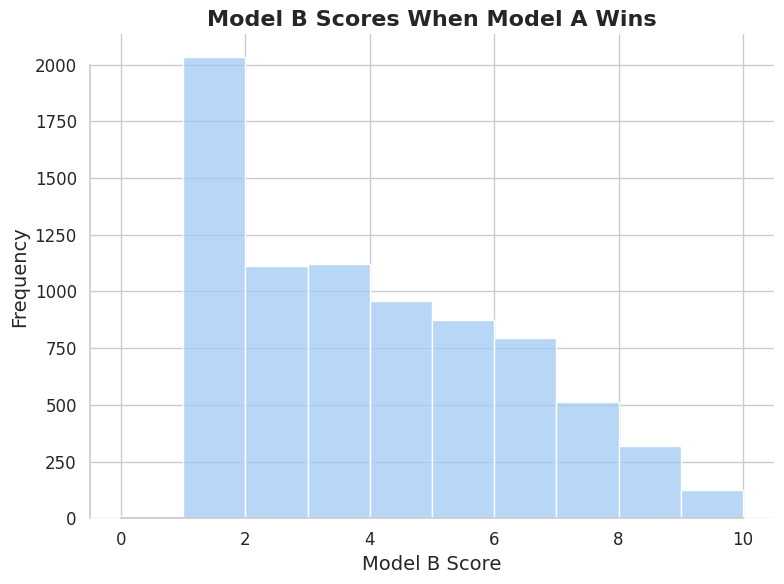

In [15]:
b_when_a = pairwise_result.loc[pairwise_result['winner']=='Model A', 'list_b_score']

plt.figure(figsize=(8,6))
ax = sns.histplot(
    b_when_a,
    bins=10,
    kde=False,
    edgecolor="w"
)
ax.set_title('Model B Scores When Model A Wins', fontsize=16, weight='bold')
ax.set_xlabel('Model B Score', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(labelsize=12)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('hist_modelB_when_A_wins.png', dpi=300, bbox_inches='tight')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


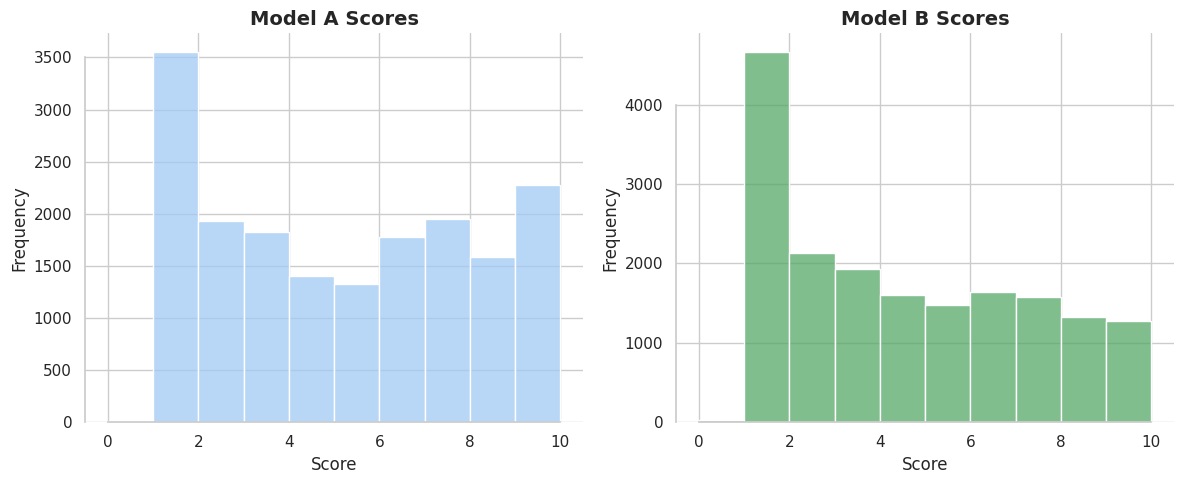

In [28]:
# Seaborn styling
sns.set_theme(style="whitegrid", palette="pastel")

# Create 2x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Top-left: Histogram of Model A scores
sns.histplot(
    pairwise_result['list_a_score'],
    bins=10,
    kde=False,
    ax=axes[ 0],
    edgecolor='w'
)
axes[ 0].set_title('Model A Scores', fontsize=14, weight='bold')
axes[0].set_xlabel('Score')
axes[ 0].set_ylabel('Frequency')

# Top-right: Histogram of Model B scores
sns.histplot(
    pairwise_result['list_b_score'],
    bins=10,
    kde=False,
    ax=axes[1],
    edgecolor='w',
    color='#55A868'
)
axes[1].set_title('Model B Scores', fontsize=14, weight='bold')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Frequency')


# Clean up layout and spines
sns.despine(trim=True)
plt.tight_layout()

# Save to file
plt.savefig('score_histograms_grid.png', dpi=300, bbox_inches='tight')
plt.show()


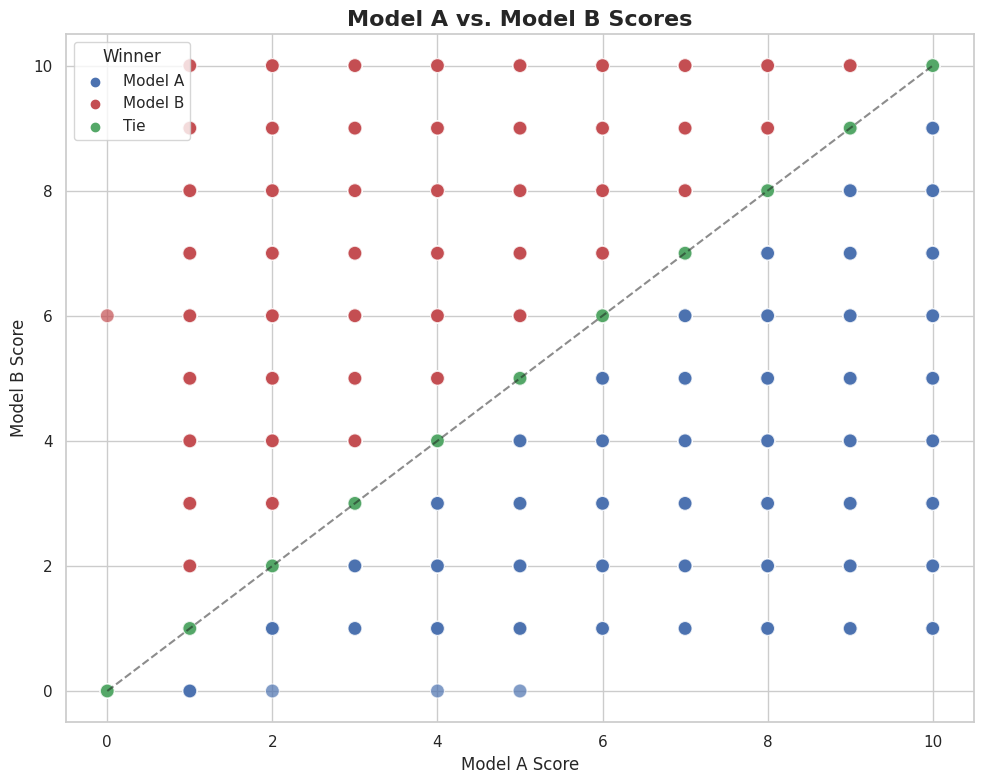

In [17]:
# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pairwise_result,
    x='list_a_score',
    y='list_b_score',
    hue='winner',
    palette={'Model A': '#4C72B0', 'Model B': '#C44E52', 'Tie': '#55A868'},
    alpha=0.7,
    s=100
)

plt.title('Model A vs. Model B Scores', fontsize=16, weight='bold')
plt.xlabel('Model A Score', fontsize=12)
plt.ylabel('Model B Score', fontsize=12)
plt.legend(title='Winner')

# Add diagonal line for equal performance
x = np.linspace(0, 10, 100)
plt.plot(x, x, 'k--', alpha=0.5, label='Equal Score')

plt.tight_layout()
plt.show()

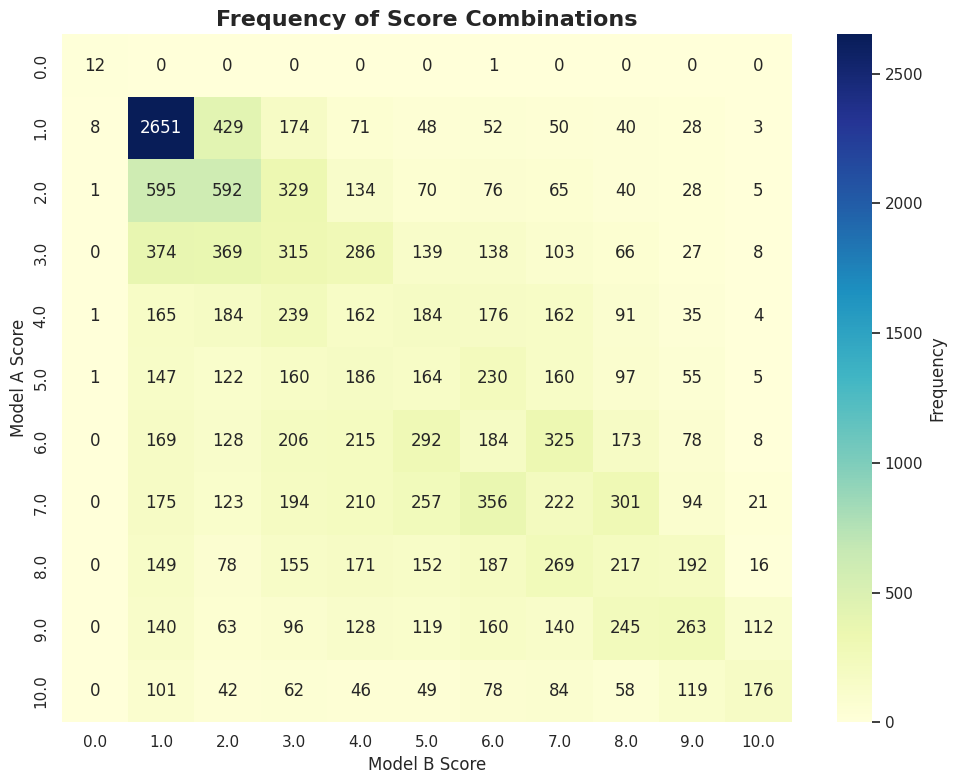

In [18]:
# Create a cross-tabulation of score frequencies
heatmap_data = pd.crosstab(
    pairwise_result['list_a_score'],
    pairwise_result['list_b_score']
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='d',
    cbar_kws={'label': 'Frequency'}
)

plt.title('Frequency of Score Combinations', fontsize=16, weight='bold')
plt.xlabel('Model B Score', fontsize=12)
plt.ylabel('Model A Score', fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


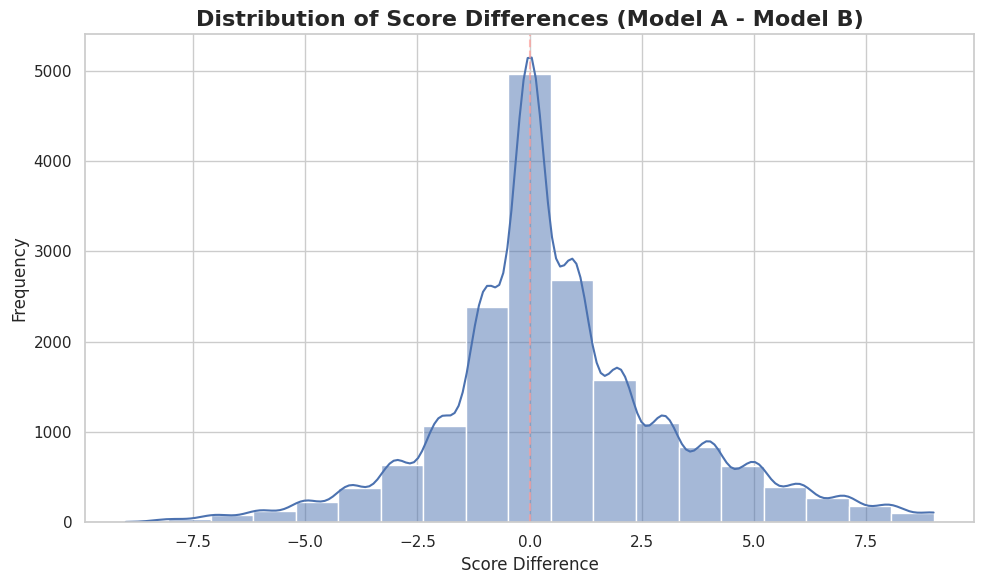

In [19]:
# Calculate score difference (Model A - Model B)
pairwise_result['score_diff'] = pairwise_result['list_a_score'] - pairwise_result['list_b_score']

# Create histogram of score differences
plt.figure(figsize=(10, 6))
sns.histplot(
    pairwise_result['score_diff'],
    bins=19,  # -9 to +9 range
    kde=True,
    color='#4C72B0'
)

plt.axvline(x=0, color='r', linestyle='--', alpha=0.7)
plt.title('Distribution of Score Differences (Model A - Model B)', fontsize=16, weight='bold')
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

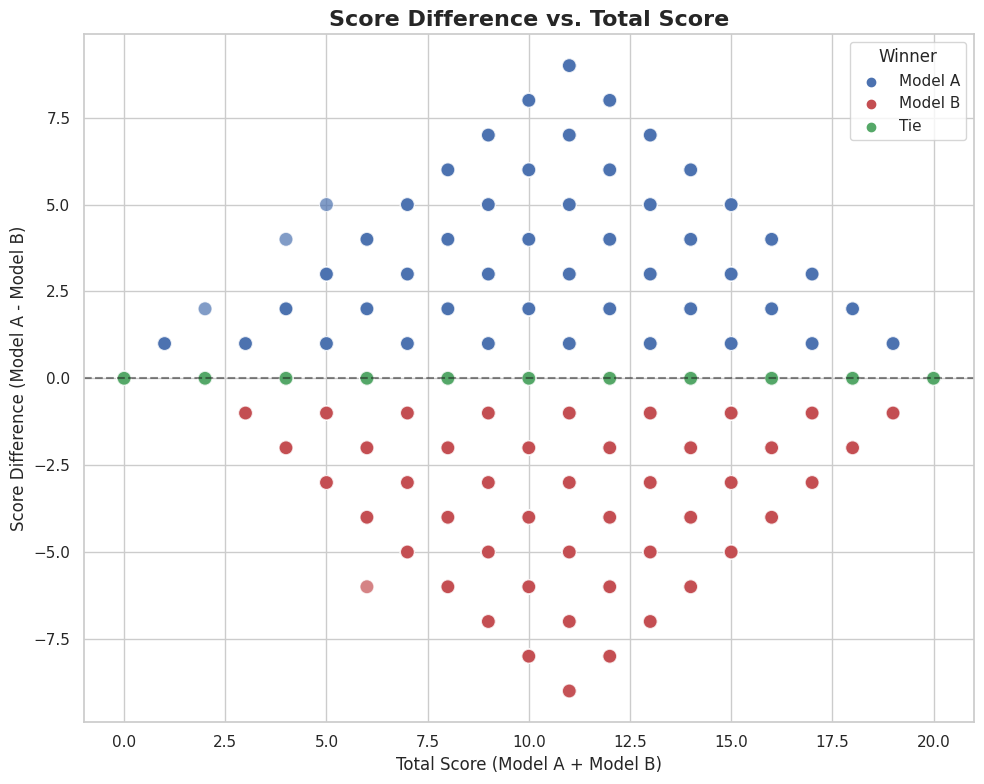

In [20]:
# Calculate total and difference
pairwise_result['total_score'] = pairwise_result['list_a_score'] + pairwise_result['list_b_score']
pairwise_result['score_diff'] = pairwise_result['list_a_score'] - pairwise_result['list_b_score']

# Create scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pairwise_result,
    x='total_score',
    y='score_diff',
    hue='winner',
    palette={'Model A': '#4C72B0', 'Model B': '#C44E52', 'Tie': '#55A868'},
    alpha=0.7,
    s=100
)

plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.title('Score Difference vs. Total Score', fontsize=16, weight='bold')
plt.xlabel('Total Score (Model A + Model B)', fontsize=12)
plt.ylabel('Score Difference (Model A - Model B)', fontsize=12)
plt.legend(title='Winner')

plt.tight_layout()
plt.show()

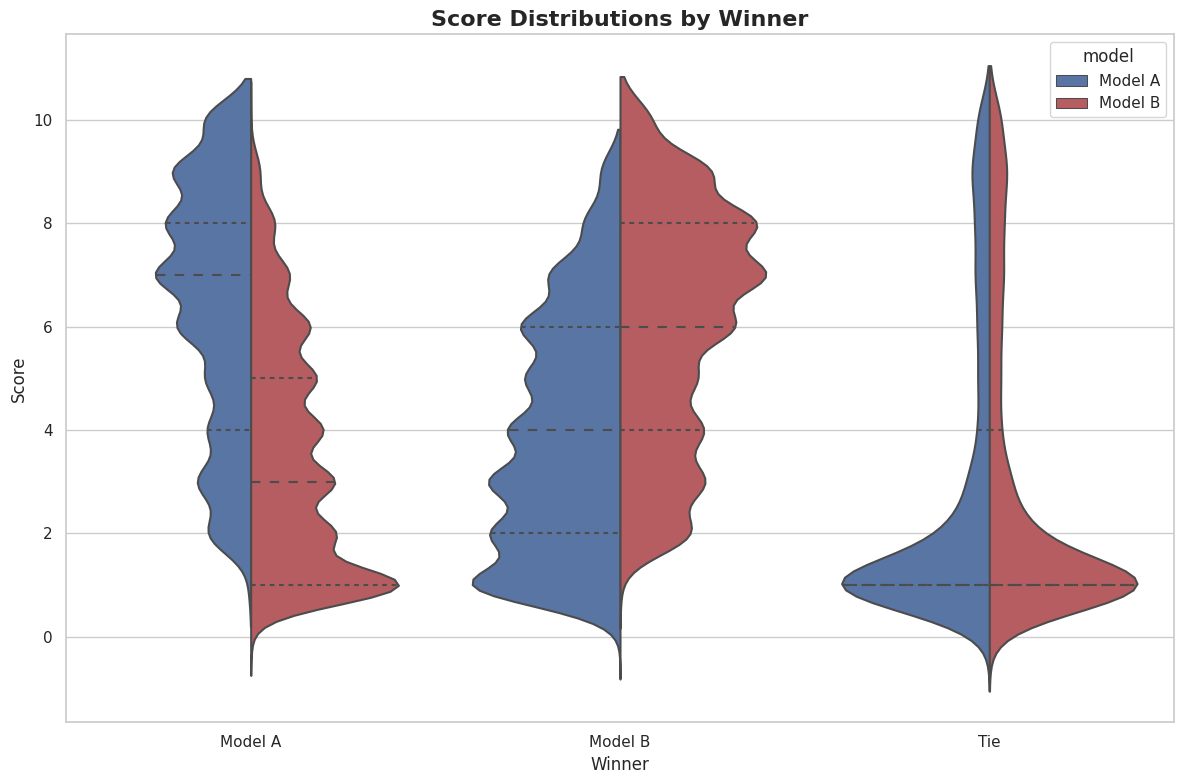

In [29]:
# Reshape data for violin plots
melted_data = pd.melt(
    pairwise_result,
    id_vars=['index', 'winner'],
    value_vars=['list_a_score', 'list_b_score'],
    var_name='model',
    value_name='score'
)
melted_data['model'] = melted_data['model'].map({'list_a_score': 'Model A', 'list_b_score': 'Model B'})

# Create violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(
    data=melted_data,
    x='winner',
    y='score',
    hue='model',
    split=True,
    inner='quart',
    palette={'Model A': '#4C72B0', 'Model B': '#C44E52'}
)

plt.title('Score Distributions by Winner', fontsize=16, weight='bold')
plt.xlabel('Winner', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.tight_layout()
plt.savefig('score_comparision_violin.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Merge results with song metadata
merged = pairwise_result.merge(songs_df.reset_index(), left_on='index', right_on='index')

In [7]:
# 1. Aggregate Win Rates & Binomial Test
nA = (merged['winner'] == 'A').sum()
nB = (merged['winner'] == 'B').sum()
n = nA + nB
pB = nB / n
print(nB)
print(pB)
# 95% Wilson confidence interval for pA
z = 1.96
ci_low = (pB + z**2/(2*n) - z * np.sqrt(pB*(1-pB)/n + z**2/(4*n**2))) / (1 + z**2/n)
ci_high= (pB + z**2/(2*n) + z * np.sqrt(pB*(1-pB)/n + z**2/(4*n**2))) / (1 + z**2/n)
pval = binomtest(nB, n, p=0.5)

agg_df = pd.DataFrame([{
    'Model A Wins': nA,
    'Model B Wins': nB,
    'Win Rate B': pB,
    '95% CI Low': ci_low,
    '95% CI High': ci_high,
    'Binomial p-value': pval
}])
agg_df

4921
0.3852054794520548


,Model A Wins,Model B Wins,Win Rate B,95% CI Low,95% CI High,Binomial p-value
0,7854,4921,0.385205,0.376802,0.393678,"BinomTestResult(k=4921, n=12775, alternative='..."


In [8]:
# 2. Stratified by Tag
genre_stats = []
for tag, group in merged.groupby('tag'):
    a = (group['winner']=='A').sum()
    b = (group['winner']=='B').sum()
    total = a + b
    if total == 0:
        continue
    p = b / total
    ci_l = (p + z**2/(2*total) - z * np.sqrt(p*(1-p)/total + z**2/(4*total**2))) / (1 + z**2/total)
    ci_h = (p + z**2/(2*total) + z * np.sqrt(p*(1-p)/total + z**2/(4*total**2))) / (1 + z**2/total)
    genre_stats.append({
        'tag': tag,
        'A Wins': a,
        'B Wins': b,
        'Win Rate B': p,
        'CI Low': ci_l,
        'CI High': ci_h
    })
genre_df = pd.DataFrame(genre_stats).sort_values('Win Rate B', ascending=False)
genre_df

,tag,A Wins,B Wins,Win Rate B,CI Low,CI High
3,rap,989,944,0.488360,0.466121,0.510645
2,pop,1330,852,0.390467,0.370207,0.411113
0,country,1350,855,0.387755,0.367630,0.408271
5,rock,1324,818,0.381886,0.361540,0.402656
4,rb,1270,699,0.355003,0.334167,0.376402
1,misc,1591,753,0.321246,0.302647,0.340429


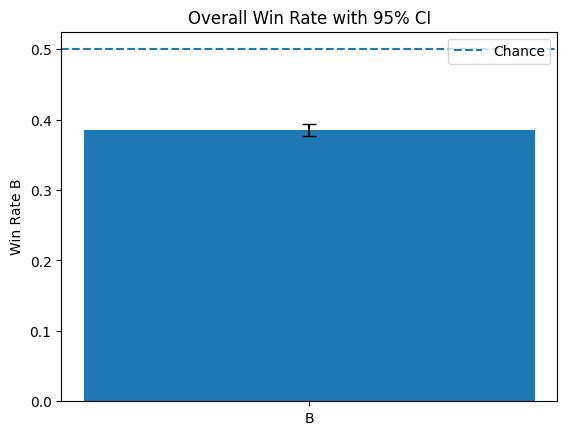

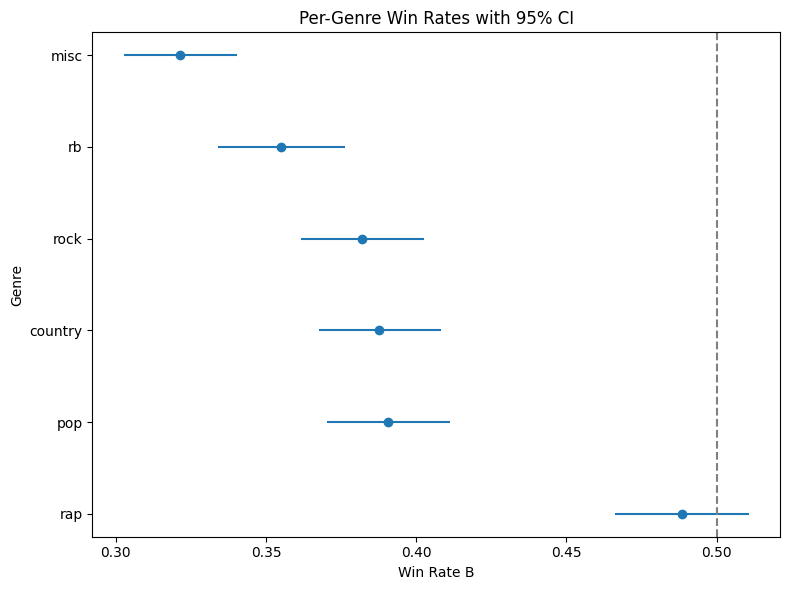

In [9]:
# 3. Visualizations
# Bar chart of overall win rate
fig, ax = plt.subplots()
ax.bar(['B'], [pB], yerr=[[pB-ci_low], [ci_high-pB]], capsize=5)
ax.axhline(0.5, linestyle='--', label='Chance')
ax.set_ylabel('Win Rate B')
ax.set_title('Overall Win Rate with 95% CI')
ax.legend()
plt.show()

# Forest plot for per-genre win rates
fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(genre_df['Win Rate B'], genre_df['tag'],
            xerr=[genre_df['Win Rate B']-genre_df['CI Low'], genre_df['CI High']-genre_df['Win Rate B']],
            fmt='o')
ax.axvline(0.5, color='gray', linestyle='--')
ax.set_xlabel('Win Rate B')
ax.set_ylabel('Genre')
ax.set_title('Per-Genre Win Rates with 95% CI')
plt.tight_layout()
plt.show()

In [20]:
merged

,index,winner,reason,title,tag,lyrics
0,168118,B,"List B includes titles like ""The Letters"" and ...",Jane Eyre Chap. 8,misc,"Ere the half-hour ended, five o’clock struck; ..."
1,506586,Tie,"Neither list provides a strong, clear thematic...",Billy,rock,[Verse 1]\nSince you're been gone now honey li...
2,249025,A,List A features multiple titles directly relat...,Got to Be Love,pop,What is this energy that's speeding up my hear...
3,380757,A,"List A contains several titles (""Addicted,"" ""F...",BAD THING,rb,"(Bad, Bad, Bad)\n(Bad, Bad, Bad)\n\nI'm laying..."
4,21945,B,"List B includes ""One Fast Move or I'm Gone: Ke...",Lost Your Mind,country,Waking up on the shoulder\nTwo friends in a pa...
...,...,...,...,...,...,...
13033,348342,B,List B offers a slightly broader range of reco...,U Feel,rb,[Peyton]\nWhen I caress you\nYou'll feel lonel...
13034,234697,A,List A provides recommendations whose titles a...,Invite Me To Trance,pop,"Key:- ""A"" - Anita; ""R"" - Ray\nA: Uh....\nBut I..."
13035,370953,B,"List B includes recommendations like ""I Wonder...",I Feel Like Breaking Up Somebodys Home Tonight,rb,[Verse 1]\nLyin' around home alone\nOn a rainy...
13036,406634,Tie,Both lists primarily offer recommendations of ...,Plastic Bag,rb,[Intro]\n(Vocals)\nThis gon' be your favorite ...


In [21]:
# 4. Qualitative Inspection
# Sample extreme cases: first 5 A wins and first 5 B wins
a_samples = merged[merged['winner']=='A'][['index','title','winner','reason']]
b_samples = merged[merged['winner']=='B'][['index','title','winner','reason']]
tie_samples = merged[merged['winner']=='Tie'][['index','title','winner','reason']]
a_samples.shape, b_samples.shape, tie_samples.shape

((6539, 4), (4003, 4), (2496, 4))